# SART Data Visualization for Water Dimer

This notebook provides tools for visualizing SART (Symmetry-Adapted Perturbation Theory) energy data for water dimer systems.

## Features:
- Plot total interaction energy vs distance
- Visualize energy components (electrostatic, exchange, deformation, induction)
- Compare different basis sets
- Interactive plots with customizable units
- **Updated**: Improved induction energy plots including total deformation energy

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12

In [8]:
# Energy unit conversion factors (from Hartree)
UNIT_CONVERSIONS = {
    'Hartree': 1.0,
    'mH': 1000.0,
    'kcal/mol': 627.5094740630557,
    'kJ/mol': 2625.4996394798254,
    'meV': 27211.386245988
}

def convert_energy(energy_hartree, target_unit='kJ/mol'):
    """
    Convert energy from Hartree to specified unit.
    
    Parameters:
    energy_hartree: float or array-like, energy in Hartree
    target_unit: str, target unit for conversion
    
    Returns:
    Converted energy value(s)
    """
    if target_unit not in UNIT_CONVERSIONS:
        raise ValueError(f"Unit {target_unit} not supported. Available units: {list(UNIT_CONVERSIONS.keys())}")
    
    return energy_hartree * UNIT_CONVERSIONS[target_unit]

In [9]:
# Load SART data
def load_sart_data(file_path):
    """
    Load SART data from CSV file.
    
    Parameters:
    file_path: str or Path, path to CSV file
    
    Returns:
    pandas.DataFrame with SART data
    """
    df = pd.read_csv(file_path)
    
    # Sort by distance for proper plotting
    df = df.sort_values('Distance').reset_index(drop=True)
    
    return df

# Load both datasets
data_6_31g = load_sart_data('water_dimer_datas/standardized_sart_results_6-31g.csv')
data_aug_cc_pvtz = load_sart_data('water_dimer_datas/standardized_sart_results_aug-cc-pVTZ.csv')

print("Data loaded successfully!")
print(f"6-31g dataset: {len(data_6_31g)} points")
print(f"aug-cc-pVTZ dataset: {len(data_aug_cc_pvtz)} points")
print("\nAvailable columns:")
print(data_6_31g.columns.tolist())

Data loaded successfully!
6-31g dataset: 15 points
aug-cc-pVTZ dataset: 15 points

Available columns:
['System', 'Distance', 'dEA', 'dEB', 'E1_elst', 'E1_exch', 'E_elst', 'E_exch', 'E_LM', 'E_LMA', 'E_LMB', 'E_int', 'E_def_tot[A]', 'E_def_tot[B]']


In [10]:
# Display first few rows to understand the data structure
print("First 5 rows of 6-31g data:")
display(data_6_31g.head())

print("\nData statistics:")
display(data_6_31g.describe())

First 5 rows of 6-31g data:


,System,Distance,dEA,dEB,E1_elst,E1_exch,E_elst,E_exch,E_LM,E_LMA,E_LMB,E_int,E_def_tot[A],E_def_tot[B]
0,H2O..H2O_900,4.157406,0.018937,0.050835,-0.078455,0.142486,-0.169297,0.165546,-0.036257,-0.045615,0.009358,0.029764,-0.026678,0.060192
1,H2O..H2O_901,4.346379,0.013743,0.036044,-0.062923,0.100951,-0.128344,0.120026,-0.027754,-0.035966,0.008212,0.013714,-0.022224,0.044256
2,H2O..H2O_902,4.535352,0.009965,0.025564,-0.050546,0.071186,-0.097579,0.085682,-0.020340,-0.027650,0.007310,0.003292,-0.017686,0.032875
3,H2O..H2O_903,4.724325,0.007219,0.018192,-0.040832,0.050005,-0.074682,0.060361,-0.014380,-0.020831,0.006451,-0.003289,-0.013612,0.024643
4,H2O..H2O_904,5.102271,0.003783,0.009343,-0.027326,0.024471,-0.045028,0.029026,-0.006553,-0.011254,0.004701,-0.009429,-0.007472,0.014044



Data statistics:


,Distance,dEA,dEB,E1_elst,E1_exch,E_elst,E_exch,E_LM,E_LMA,E_LMB,E_int,E_def_tot[A],E_def_tot[B]
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,1.500000e+01,15.000000,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000
mean,6.159562,0.004197,0.010780,-0.024688,2.937688e-02,-0.044555,3.454754e-02,-0.007723,-1.109102e-02,3.367937e-03,-0.002753,-0.006894,0.014148
std,1.972936,0.005764,0.015367,0.023328,4.332575e-02,0.050717,5.103974e-02,0.011597,1.460256e-02,3.159899e-03,0.011197,0.008872,0.018351
min,4.157406,0.000006,0.000003,-0.078455,7.571914e-09,-0.169297,-6.049721e-09,-0.036257,-4.561528e-02,1.027888e-08,-0.010701,-0.026678,0.000003
25%,4.913298,0.000500,0.001001,-0.034079,2.050823e-03,-0.059855,2.053064e-03,-0.010467,-1.604277e-02,8.135485e-04,-0.009733,-0.010542,0.001814
50%,5.654828,0.001507,0.003605,-0.016328,8.519527e-03,-0.023407,9.466239e-03,-0.001698,-4.184674e-03,2.486348e-03,-0.007428,-0.002678,0.006091
75%,6.425082,0.005501,0.013768,-0.009243,3.723765e-02,-0.011441,4.469353e-02,-0.000208,-1.021819e-03,5.575846e-03,-0.001640,-0.000522,0.019344
max,11.338380,0.018937,0.050835,-0.001145,1.424863e-01,-0.001162,1.655464e-01,0.000004,-2.237627e-09,9.357824e-03,0.029764,0.000021,0.060192


In [11]:
# Define energy components for analysis
ENERGY_COMPONENTS = {
    'E_int': 'Total Interaction Energy',
    'E1_elst': 'First-order Electrostatic',
    'E1_exch': 'First-order Exchange',
    'E_elst': 'Converged Electrostatic',
    'E_exch': 'Converged Exchange',
    'dEA': 'Deformation Energy [A]',
    'dEB': 'Deformation Energy [B]',
    'E_LM': 'Landshoff-Murrell Energy'
}

# Calculate derived quantities
def calculate_derived_energies(df):
    """
    Calculate derived energy quantities from SART data.
    
    Parameters:
    df: pandas.DataFrame with SART data
    
    Returns:
    pandas.DataFrame with additional derived quantities
    """
    df_calc = df.copy()
    
    # Total deformation energy
    df_calc['E_def_tot'] = df_calc['dEA'] + df_calc['dEB'] + df_calc['E_LM']
    
    # Electrostatic relaxation energy
    df_calc['E_elst_rel'] = df_calc['E_elst'] - df_calc['E1_elst']
    
    # Exchange relaxation energy
    df_calc['E_exch_rel'] = df_calc['E_exch'] - df_calc['E1_exch']
    
    # Intermolecular induction energy
    df_calc['E_ind_inter'] = df_calc['E_elst_rel'] + df_calc['E_exch_rel']
    
    # Total induction energy
    df_calc['E_ind_tot'] = df_calc['E_def_tot'] + df_calc['E_ind_inter']
    
    return df_calc

# Calculate derived energies for both datasets
data_6_31g_calc = calculate_derived_energies(data_6_31g)
data_aug_cc_pvtz_calc = calculate_derived_energies(data_aug_cc_pvtz)

print("Derived energies calculated!")
print("\nNew columns added:")
new_cols = [col for col in data_6_31g_calc.columns if col not in data_6_31g.columns]
print(new_cols)

Derived energies calculated!

New columns added:
['E_def_tot', 'E_elst_rel', 'E_exch_rel', 'E_ind_inter', 'E_ind_tot']


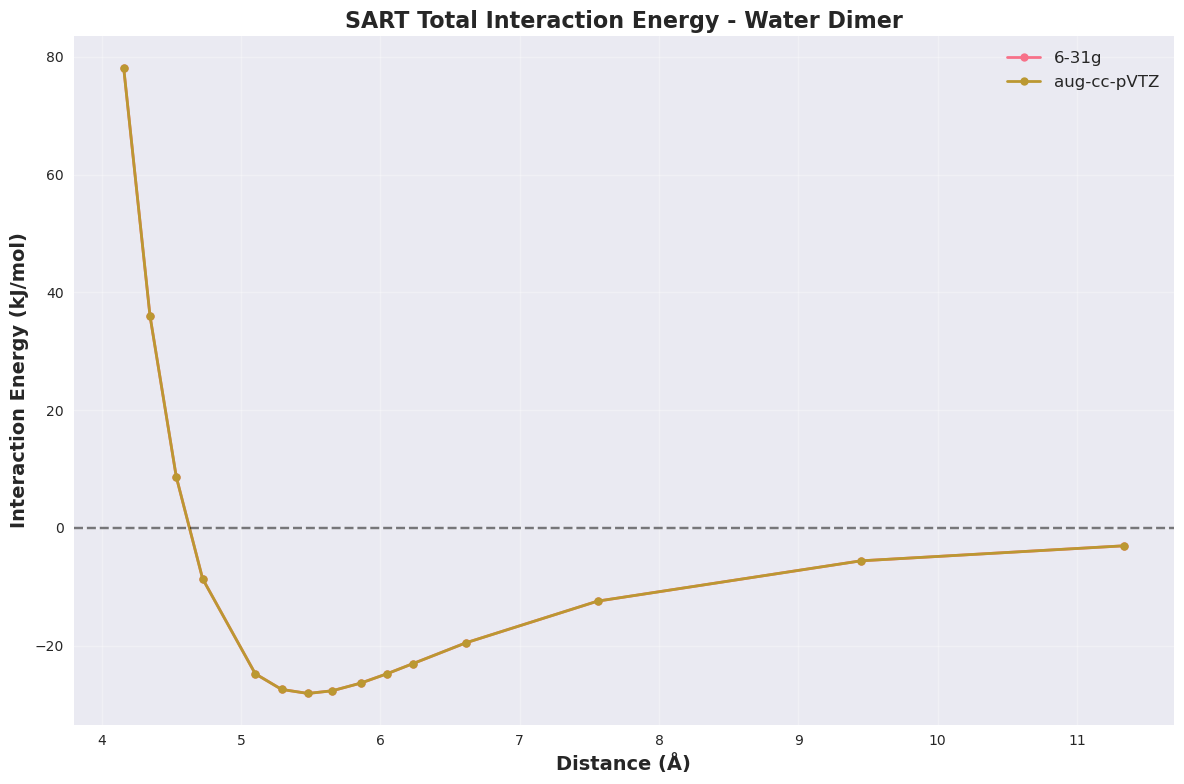

In [12]:
# Plotting functions
def plot_interaction_energy(data_dict, energy_unit='kJ/mol', figsize=(12, 8)):
    """
    Plot total interaction energy vs distance for different basis sets.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    for basis_name, df in data_dict.items():
        energy_converted = convert_energy(df['E_int'], energy_unit)
        ax.plot(df['Distance'], energy_converted, 'o-', label=basis_name, linewidth=2, markersize=6)
    
    ax.set_xlabel('Distance (Å)', fontweight='bold')
    ax.set_ylabel(f'Interaction Energy ({energy_unit})', fontweight='bold')
    ax.set_title('SART Total Interaction Energy - Water Dimer', fontweight='bold', fontsize=16)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add horizontal line at zero
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig, ax

# Plot total interaction energy
data_dict = {
    '6-31g': data_6_31g_calc,
    'aug-cc-pVTZ': data_aug_cc_pvtz_calc
}

fig, ax = plot_interaction_energy(data_dict, energy_unit='kJ/mol')
plt.show()

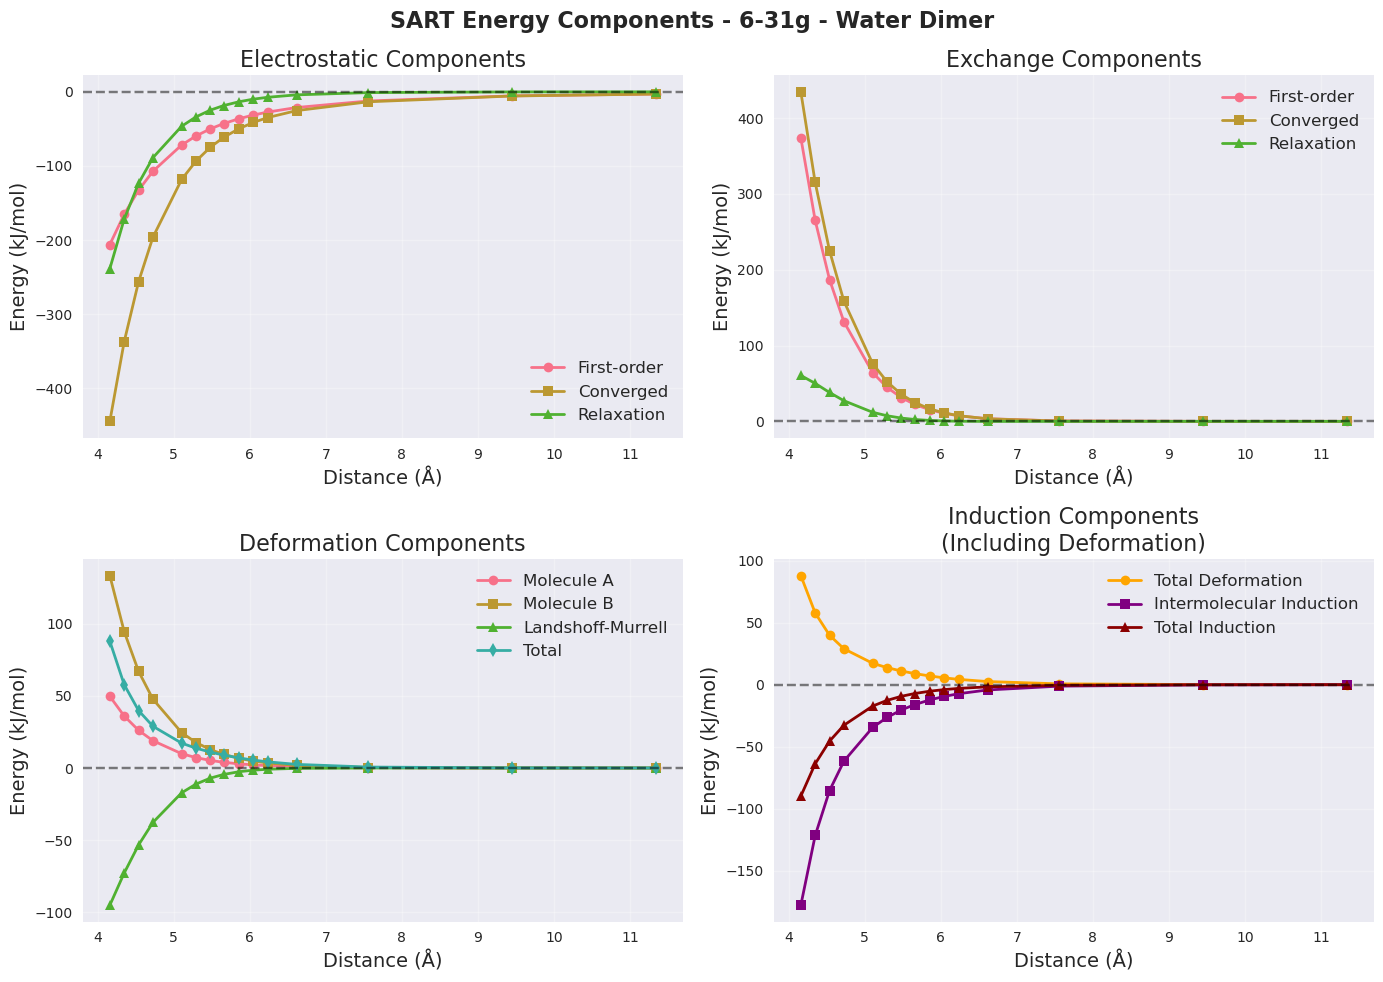

In [13]:
def plot_energy_components(df, basis_name, energy_unit='kJ/mol', figsize=(14, 10)):
    """
    Plot energy components for a single basis set.
    
    Parameters:
    df: pandas.DataFrame with SART data
    basis_name: str, name of the basis set
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=figsize)
    
    # Plot 1: Electrostatic components
    ax1.plot(df['Distance'], convert_energy(df['E1_elst'], energy_unit), 'o-', label='First-order', linewidth=2)
    ax1.plot(df['Distance'], convert_energy(df['E_elst'], energy_unit), 's-', label='Converged', linewidth=2)
    ax1.plot(df['Distance'], convert_energy(df['E_elst_rel'], energy_unit), '^-', label='Relaxation', linewidth=2)
    ax1.set_xlabel('Distance (Å)')
    ax1.set_ylabel(f'Energy ({energy_unit})')
    ax1.set_title('Electrostatic Components')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 2: Exchange components
    ax2.plot(df['Distance'], convert_energy(df['E1_exch'], energy_unit), 'o-', label='First-order', linewidth=2)
    ax2.plot(df['Distance'], convert_energy(df['E_exch'], energy_unit), 's-', label='Converged', linewidth=2)
    ax2.plot(df['Distance'], convert_energy(df['E_exch_rel'], energy_unit), '^-', label='Relaxation', linewidth=2)
    ax2.set_xlabel('Distance (Å)')
    ax2.set_ylabel(f'Energy ({energy_unit})')
    ax2.set_title('Exchange Components')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 3: Deformation components
    ax3.plot(df['Distance'], convert_energy(df['dEA'], energy_unit), 'o-', label='Molecule A', linewidth=2)
    ax3.plot(df['Distance'], convert_energy(df['dEB'], energy_unit), 's-', label='Molecule B', linewidth=2)
    ax3.plot(df['Distance'], convert_energy(df['E_LM'], energy_unit), '^-', label='Landshoff-Murrell', linewidth=2)
    ax3.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'd-', label='Total', linewidth=2)
    ax3.set_xlabel('Distance (Å)')
    ax3.set_ylabel(f'Energy ({energy_unit})')
    ax3.set_title('Deformation Components')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    # Plot 4: Induction components (UPDATED to include deformation)
    ax4.plot(df['Distance'], convert_energy(df['E_def_tot'], energy_unit), 'o-', label='Total Deformation', linewidth=2, color='orange')
    ax4.plot(df['Distance'], convert_energy(df['E_ind_inter'], energy_unit), 's-', label='Intermolecular Induction', linewidth=2, color='purple')
    ax4.plot(df['Distance'], convert_energy(df['E_ind_tot'], energy_unit), '^-', label='Total Induction', linewidth=2, color='darkred')
    ax4.set_xlabel('Distance (Å)')
    ax4.set_ylabel(f'Energy ({energy_unit})')
    ax4.set_title('Induction Components\n(Including Deformation)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.suptitle(f'SART Energy Components - {basis_name} - Water Dimer', fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

# Plot energy components for 6-31g basis set
fig = plot_energy_components(data_6_31g_calc, '6-31g', energy_unit='kJ/mol')
plt.show()

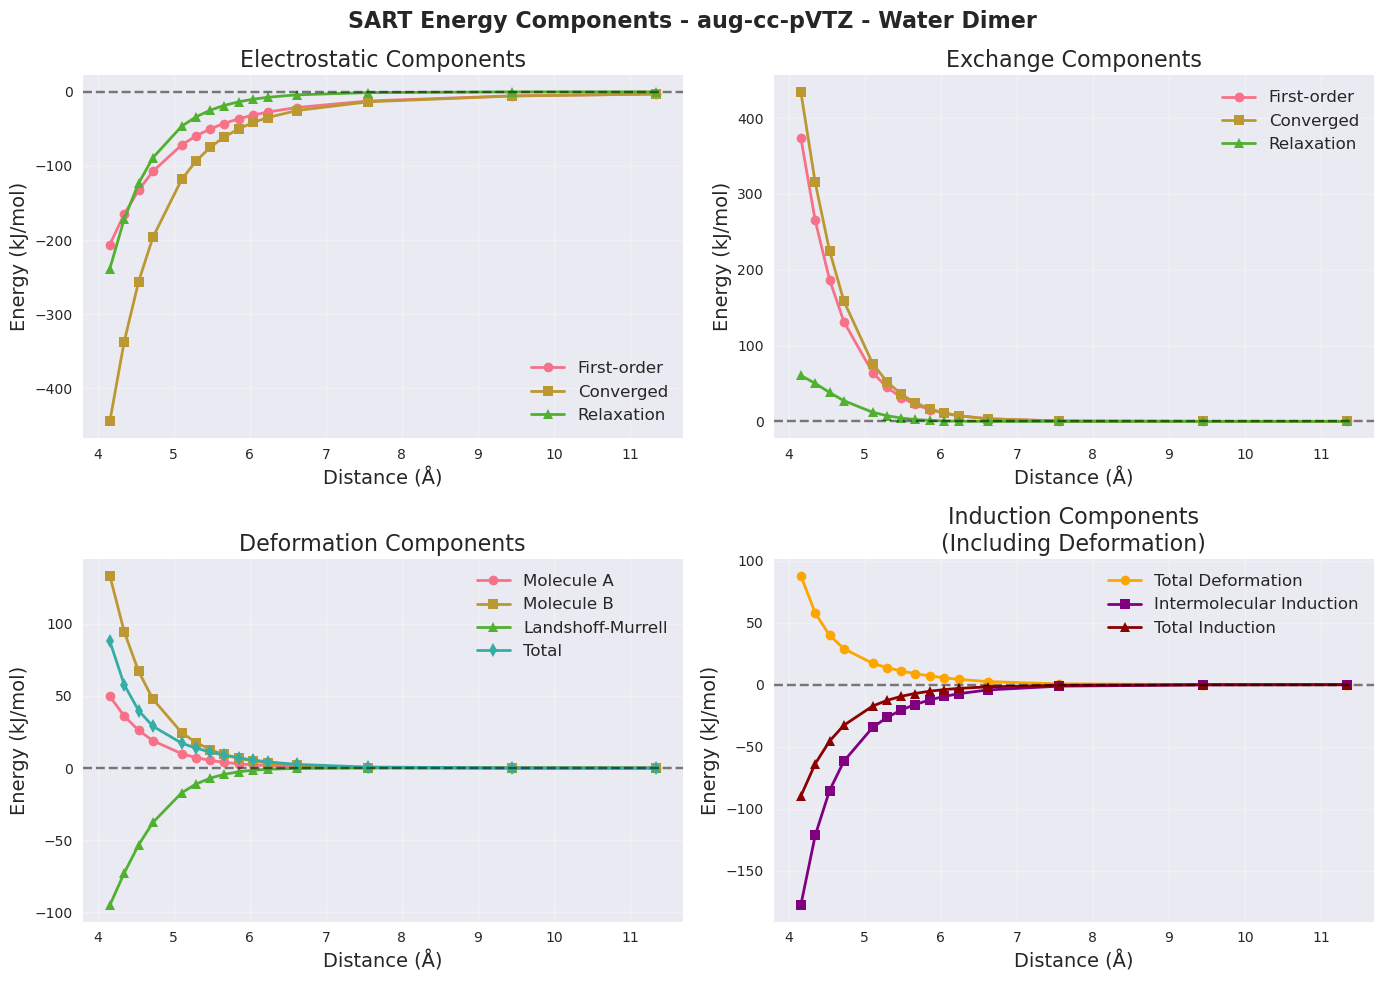

In [14]:
# Plot energy components for aug-cc-pVTZ basis set
fig = plot_energy_components(data_aug_cc_pvtz_calc, 'aug-cc-pVTZ', energy_unit='kJ/mol')
plt.show()

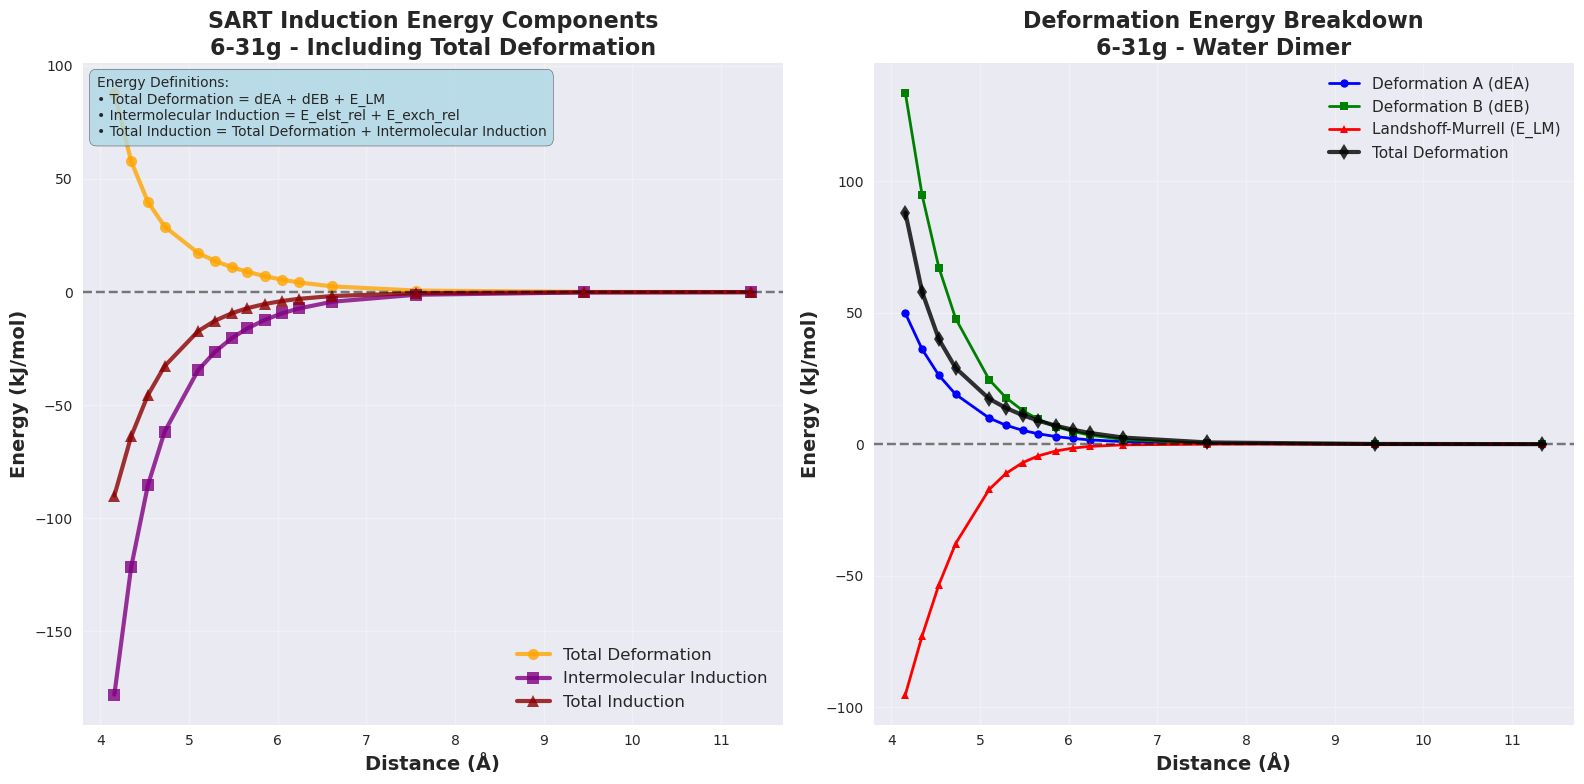

In [15]:
# NEW: Improved induction energy plot with deformation
def plot_induction_with_deformation(df, basis_name, energy_unit='kJ/mol', figsize=(16, 8)):
    """
    Plot induction energy components including total deformation energy.
    
    Parameters:
    df: pandas.DataFrame with SART data
    basis_name: str, name of the basis set
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    distances = df['Distance']
    
    # Plot 1: Induction components including deformation
    e_def_tot = convert_energy(df['E_def_tot'], energy_unit)
    e_ind_inter = convert_energy(df['E_ind_inter'], energy_unit)
    e_ind_tot = convert_energy(df['E_ind_tot'], energy_unit)
    
    ax1.plot(distances, e_def_tot, 'o-', linewidth=3, markersize=8, 
             label='Total Deformation', color='orange', alpha=0.8)
    ax1.plot(distances, e_ind_inter, 's-', linewidth=3, markersize=8, 
             label='Intermolecular Induction', color='purple', alpha=0.8)
    ax1.plot(distances, e_ind_tot, '^-', linewidth=3, markersize=8, 
             label='Total Induction', color='darkred', alpha=0.8)
    
    ax1.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax1.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
    ax1.set_ylabel(f'Energy ({energy_unit})', fontsize=14, fontweight='bold')
    ax1.set_title(f'SART Induction Energy Components\n{basis_name} - Including Total Deformation', 
                  fontsize=16, fontweight='bold')
    ax1.legend(fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # Add text box with energy definitions
    definitions_text = """Energy Definitions:
• Total Deformation = dEA + dEB + E_LM
• Intermolecular Induction = E_elst_rel + E_exch_rel
• Total Induction = Total Deformation + Intermolecular Induction"""
    
    ax1.text(0.02, 0.98, definitions_text, transform=ax1.transAxes, 
             verticalalignment='top', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))
    
    # Plot 2: Detailed breakdown of deformation components
    e_dEA = convert_energy(df['dEA'], energy_unit)
    e_dEB = convert_energy(df['dEB'], energy_unit)
    e_LM = convert_energy(df['E_LM'], energy_unit)
    
    ax2.plot(distances, e_dEA, 'o-', linewidth=2, markersize=6, 
             label='Deformation A (dEA)', color='blue')
    ax2.plot(distances, e_dEB, 's-', linewidth=2, markersize=6, 
             label='Deformation B (dEB)', color='green')
    ax2.plot(distances, e_LM, '^-', linewidth=2, markersize=6, 
             label='Landshoff-Murrell (E_LM)', color='red')
    ax2.plot(distances, e_def_tot, 'd-', linewidth=3, markersize=8, 
             label='Total Deformation', color='black', alpha=0.8)
    
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.set_xlabel('Distance (Å)', fontsize=14, fontweight='bold')
    ax2.set_ylabel(f'Energy ({energy_unit})', fontsize=14, fontweight='bold')
    ax2.set_title(f'Deformation Energy Breakdown\n{basis_name} - Water Dimer', 
                  fontsize=16, fontweight='bold')
    ax2.legend(fontsize=11)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

# Plot improved induction energy for 6-31g
fig = plot_induction_with_deformation(data_6_31g_calc, '6-31g', energy_unit='kJ/mol')
plt.show()

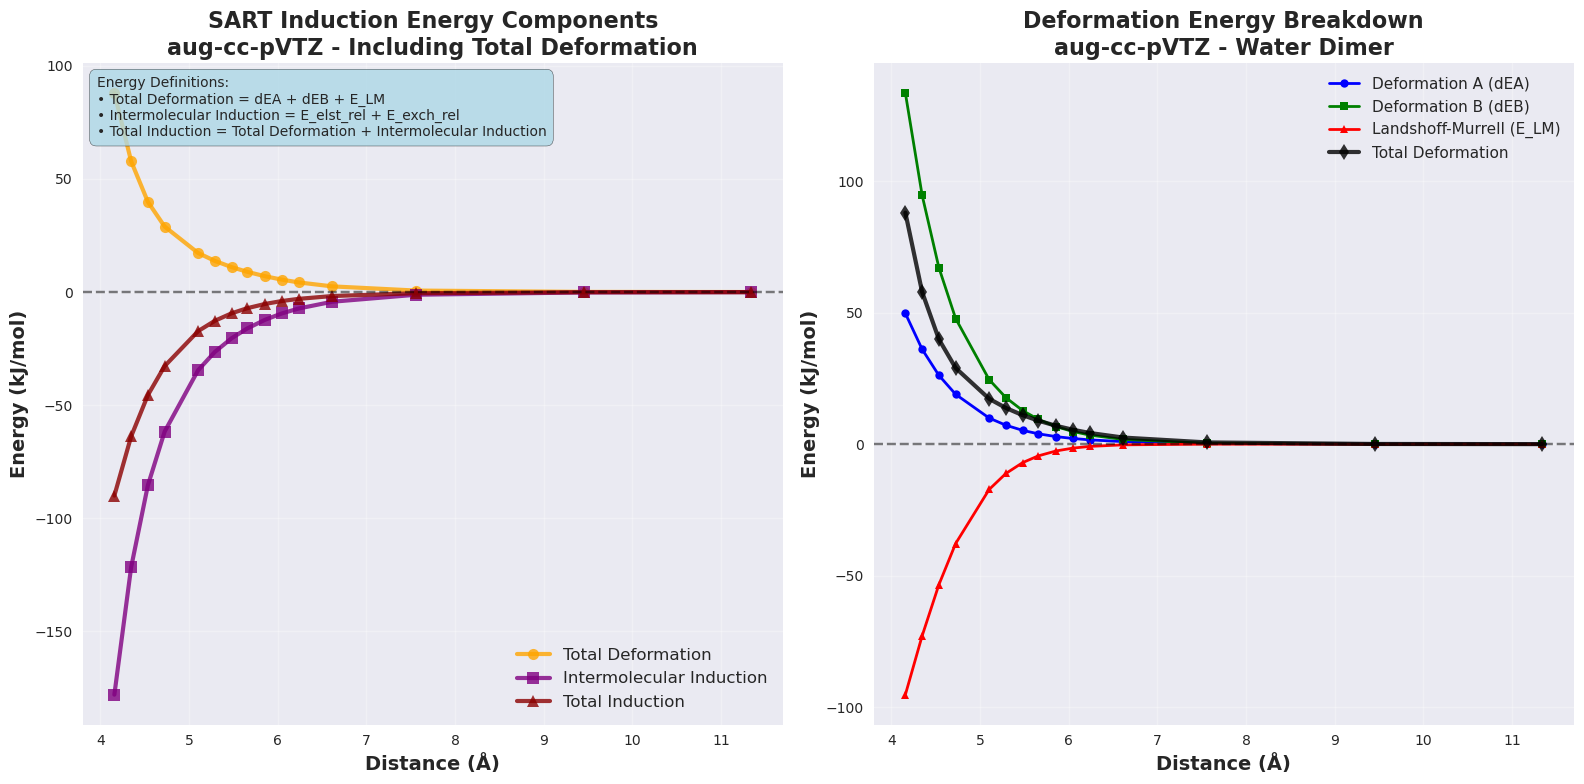

In [16]:
# Plot improved induction energy for aug-cc-pVTZ
fig = plot_induction_with_deformation(data_aug_cc_pvtz_calc, 'aug-cc-pVTZ', energy_unit='kJ/mol')
plt.show()

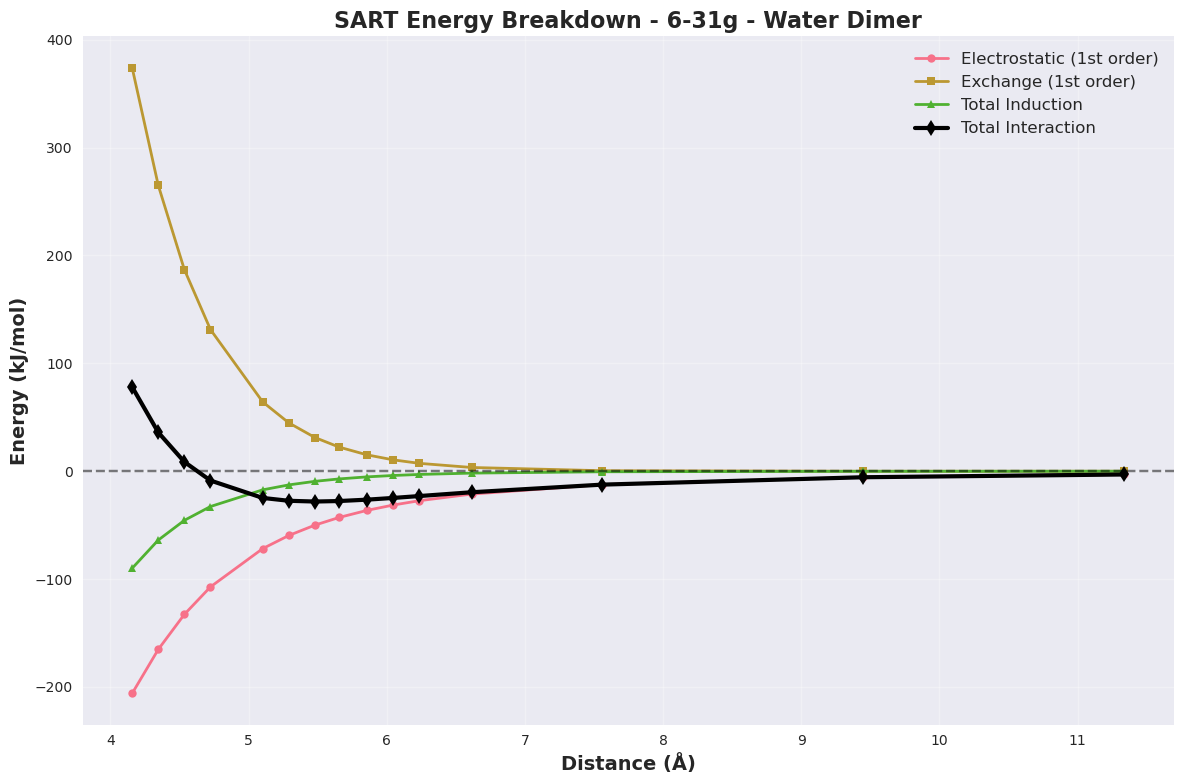

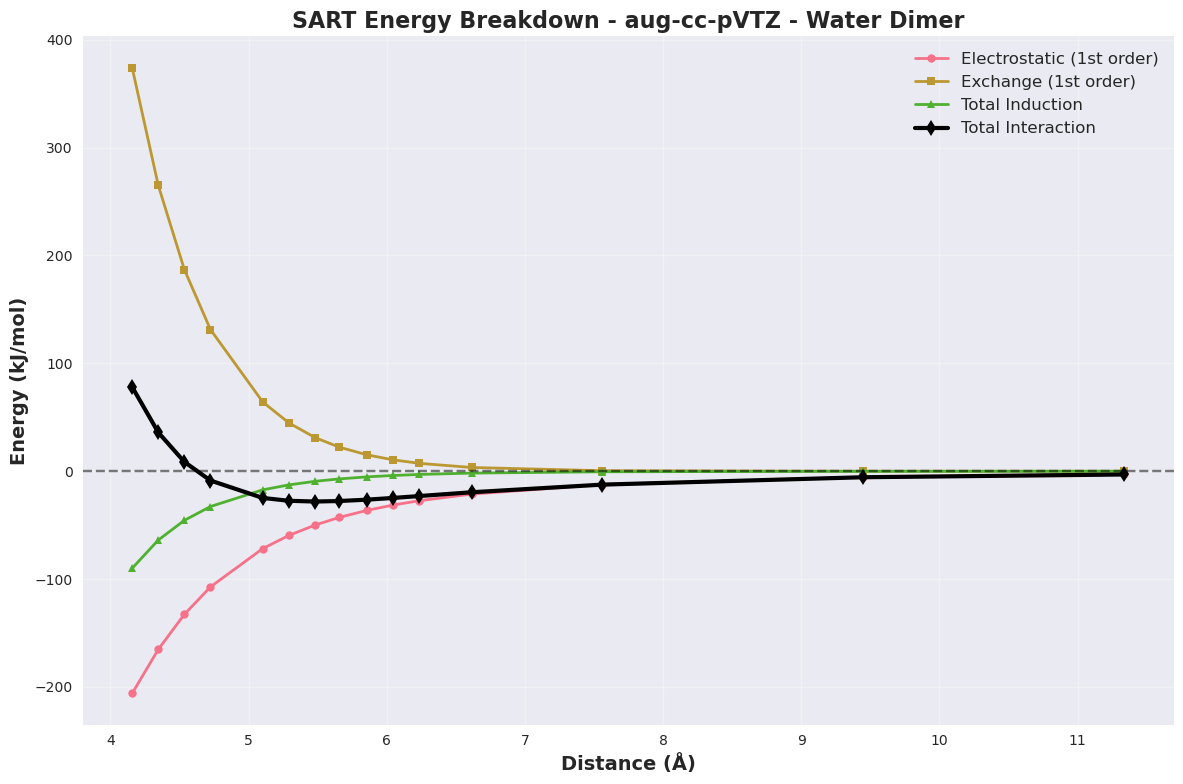

In [17]:
def plot_energy_breakdown(df, basis_name, energy_unit='kJ/mol', figsize=(12, 8)):
    """
    Plot stacked energy breakdown showing contribution of each component.
    
    Parameters:
    df: pandas.DataFrame with SART data
    basis_name: str, name of the basis set
    energy_unit: str, unit for energy conversion
    figsize: tuple, figure size
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    # Convert energies
    distances = df['Distance']
    e_elst_1 = convert_energy(df['E1_elst'], energy_unit)
    e_exch_1 = convert_energy(df['E1_exch'], energy_unit)
    e_ind_tot = convert_energy(df['E_ind_tot'], energy_unit)
    e_int = convert_energy(df['E_int'], energy_unit)
    
    # Plot components
    ax.plot(distances, e_elst_1, 'o-', label='Electrostatic (1st order)', linewidth=2, markersize=6)
    ax.plot(distances, e_exch_1, 's-', label='Exchange (1st order)', linewidth=2, markersize=6)
    ax.plot(distances, e_ind_tot, '^-', label='Total Induction', linewidth=2, markersize=6)
    ax.plot(distances, e_int, 'd-', label='Total Interaction', linewidth=3, markersize=8, color='black')
    
    ax.set_xlabel('Distance (Å)', fontweight='bold')
    ax.set_ylabel(f'Energy ({energy_unit})', fontweight='bold')
    ax.set_title(f'SART Energy Breakdown - {basis_name} - Water Dimer', fontweight='bold', fontsize=16)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig, ax

# Plot energy breakdown for both basis sets
fig1, ax1 = plot_energy_breakdown(data_6_31g_calc, '6-31g', energy_unit='kJ/mol')
plt.show()

fig2, ax2 = plot_energy_breakdown(data_aug_cc_pvtz_calc, 'aug-cc-pVTZ', energy_unit='kJ/mol')
plt.show()

Plotting in kJ/mol:


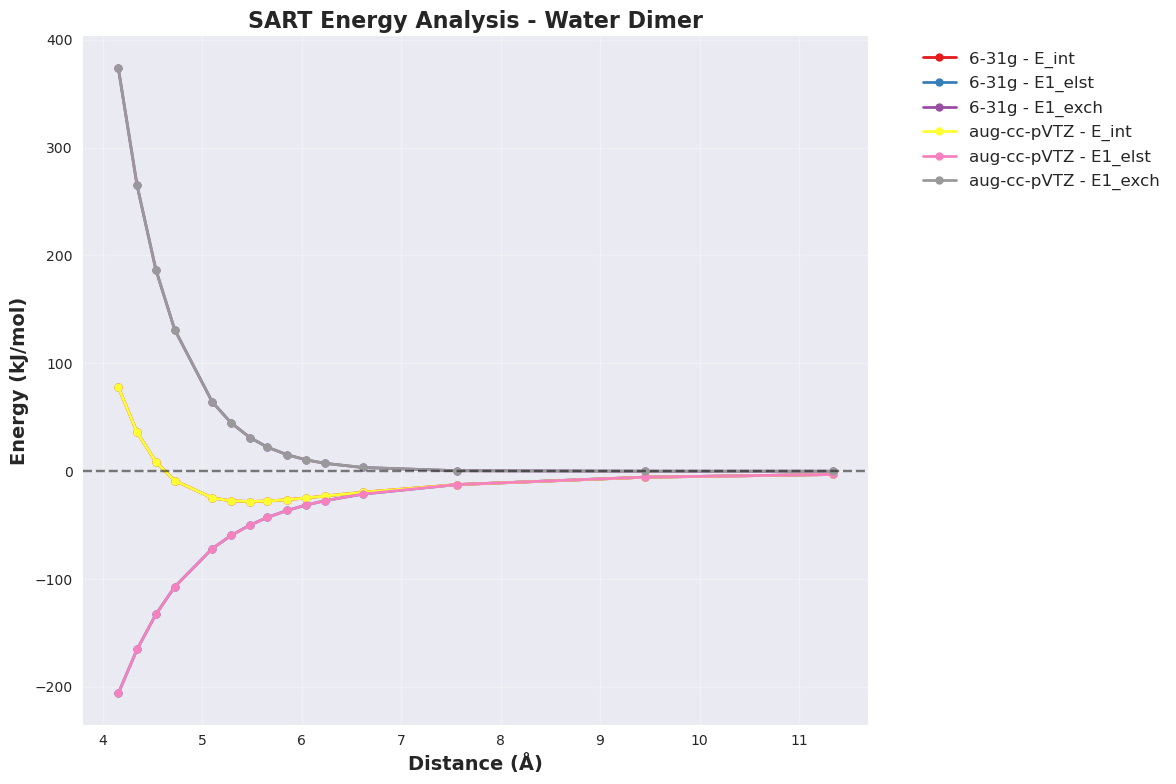


Plotting in kcal/mol:


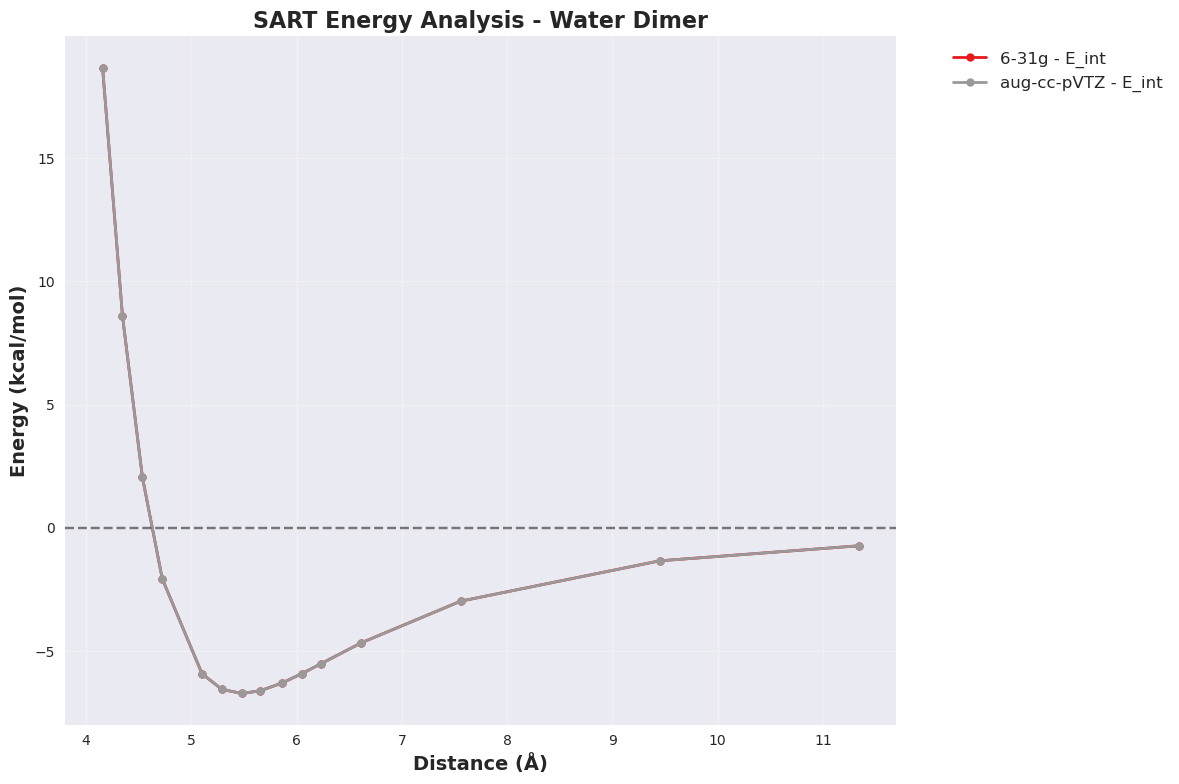

In [18]:
# Interactive plotting function with unit selection
def interactive_plot(data_dict, energy_columns=None, energy_unit='kJ/mol'):
    """
    Create interactive plots with customizable energy unit and components.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    energy_columns: list, list of energy columns to plot (if None, plots total interaction)
    energy_unit: str, unit for energy conversion
    """
    if energy_columns is None:
        energy_columns = ['E_int']
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    colors = plt.cm.Set1(np.linspace(0, 1, len(data_dict) * len(energy_columns)))
    color_idx = 0
    
    for basis_name, df in data_dict.items():
        for col in energy_columns:
            if col in df.columns:
                energy_converted = convert_energy(df[col], energy_unit)
                label = f'{basis_name} - {col}'
                ax.plot(df['Distance'], energy_converted, 'o-', 
                       label=label, linewidth=2, markersize=6, color=colors[color_idx])
                color_idx += 1
    
    ax.set_xlabel('Distance (Å)', fontweight='bold')
    ax.set_ylabel(f'Energy ({energy_unit})', fontweight='bold')
    ax.set_title('SART Energy Analysis - Water Dimer', fontweight='bold', fontsize=16)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    return fig, ax

# Example: Plot multiple energy components in different units
print("Plotting in kJ/mol:")
fig, ax = interactive_plot(data_dict, ['E_int', 'E1_elst', 'E1_exch'], 'kJ/mol')
plt.show()

print("\nPlotting in kcal/mol:")
fig, ax = interactive_plot(data_dict, ['E_int'], 'kcal/mol')
plt.show()

In [19]:
# Summary statistics and analysis
def analyze_interaction_energy(df, basis_name):
    """
    Analyze interaction energy data and provide summary statistics.
    
    Parameters:
    df: pandas.DataFrame with SART data
    basis_name: str, name of the basis set
    """
    print(f"\n=== SART Analysis Summary - {basis_name} ===")
    print(f"Distance range: {df['Distance'].min():.3f} - {df['Distance'].max():.3f} Å")
    
    # Find minimum interaction energy (most stable configuration)
    min_idx = df['E_int'].idxmin()
    min_energy_kj = convert_energy(df.loc[min_idx, 'E_int'], 'kJ/mol')
    min_distance = df.loc[min_idx, 'Distance']
    
    print(f"Minimum interaction energy: {min_energy_kj:.3f} kJ/mol at {min_distance:.3f} Å")
    
    # Energy at longest distance (reference)
    max_idx = df['Distance'].idxmax()
    ref_energy_kj = convert_energy(df.loc[max_idx, 'E_int'], 'kJ/mol')
    ref_distance = df.loc[max_idx, 'Distance']
    
    print(f"Energy at {ref_distance:.3f} Å: {ref_energy_kj:.3f} kJ/mol")
    
    # Component analysis at minimum
    print(f"\nEnergy components at minimum ({min_distance:.3f} Å):")
    components = ['E1_elst', 'E1_exch', 'E_def_tot', 'E_ind_tot']
    for comp in components:
        if comp in df.columns:
            energy_kj = convert_energy(df.loc[min_idx, comp], 'kJ/mol')
            print(f"  {comp}: {energy_kj:.3f} kJ/mol")

# Analyze both datasets
analyze_interaction_energy(data_6_31g_calc, '6-31g')
analyze_interaction_energy(data_aug_cc_pvtz_calc, 'aug-cc-pVTZ')


=== SART Analysis Summary - 6-31g ===
Distance range: 4.157 - 11.338 Å
Minimum interaction energy: -28.095 kJ/mol at 5.480 Å
Energy at 11.338 Å: -3.028 kJ/mol

Energy components at minimum (5.480 Å):
  E1_elst: -49.961 kJ/mol
  E1_exch: 31.242 kJ/mol
  E_def_tot: 11.025 kJ/mol
  E_ind_tot: -9.375 kJ/mol

=== SART Analysis Summary - aug-cc-pVTZ ===
Distance range: 4.157 - 11.338 Å
Minimum interaction energy: -28.095 kJ/mol at 5.480 Å
Energy at 11.338 Å: -3.028 kJ/mol

Energy components at minimum (5.480 Å):
  E1_elst: -49.961 kJ/mol
  E1_exch: 31.242 kJ/mol
  E_def_tot: 11.025 kJ/mol
  E_ind_tot: -9.375 kJ/mol


In [20]:
# Save plots function
def save_all_plots(data_dict, output_dir='sart_plots', energy_unit='kJ/mol'):
    """
    Save all generated plots to files.
    
    Parameters:
    data_dict: dict, dictionary with basis set names as keys and DataFrames as values
    output_dir: str, directory to save plots
    energy_unit: str, unit for energy conversion
    """
    import os
    
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Save interaction energy comparison
    fig, ax = plot_interaction_energy(data_dict, energy_unit)
    fig.savefig(f'{output_dir}/interaction_energy_comparison_{energy_unit.replace("/", "_")}.png', 
                dpi=300, bbox_inches='tight')
    plt.close(fig)
    
    # Save component plots for each basis set
    for basis_name, df in data_dict.items():
        fig = plot_energy_components(df, basis_name, energy_unit)
        fig.savefig(f'{output_dir}/energy_components_{basis_name.replace("-", "_")}_{energy_unit.replace("/", "_")}.png', 
                    dpi=300, bbox_inches='tight')
        plt.close(fig)
        
        # Save improved induction plots
        fig = plot_induction_with_deformation(df, basis_name, energy_unit)
        fig.savefig(f'{output_dir}/induction_with_deformation_{basis_name.replace("-", "_")}_{energy_unit.replace("/", "_")}.png', 
                    dpi=300, bbox_inches='tight')
        plt.close(fig)
        
        fig, ax = plot_energy_breakdown(df, basis_name, energy_unit)
        fig.savefig(f'{output_dir}/energy_breakdown_{basis_name.replace("-", "_")}_{energy_unit.replace("/", "_")}.png', 
                    dpi=300, bbox_inches='tight')
        plt.close(fig)
    
    print(f"All plots saved to {output_dir}/")

# Uncomment the line below to save all plots
# save_all_plots(data_dict, energy_unit='kJ/mol')

## Usage Instructions

1. **Load Data**: The notebook automatically loads SART data from CSV files. Make sure the files are in the same directory as this notebook.

2. **Visualize Data**: Use the plotting functions to create various visualizations:
   - `plot_interaction_energy()`: Compare total interaction energies between basis sets
   - `plot_energy_components()`: Detailed view of all energy components for a single basis set
   - `plot_induction_with_deformation()`: **NEW** - Improved induction energy plot including total deformation
   - `plot_energy_breakdown()`: Main energy contributions on a single plot
   - `interactive_plot()`: Customizable plots with unit selection

3. **Change Units**: Modify the `energy_unit` parameter in any plotting function. Available units:
   - 'Hartree'
   - 'kcal/mol'
   - 'kJ/mol' (default)
   - 'meV'
   - 'mH' (milliHartree)

4. **Analyze Results**: Use `analyze_interaction_energy()` to get summary statistics.

5. **Save Plots**: Use `save_all_plots()` to export all visualizations as high-resolution PNG files.

## Energy Components Explained

- **E_int**: Total interaction energy
- **E1_elst**: First-order electrostatic energy
- **E1_exch**: First-order exchange energy
- **E_elst**: Converged electrostatic energy
- **E_exch**: Converged exchange energy
- **dEA, dEB**: Deformation energies for molecules A and B
- **E_LM**: Landshoff-Murrell energy
- **E_def_tot**: Total deformation energy (dEA + dEB + E_LM)
- **E_ind_tot**: Total induction energy (E_def_tot + E_ind_inter)
- **E_ind_inter**: Intermolecular induction energy (E_elst_rel + E_exch_rel)

## Updates in This Version

- **Default unit changed to kJ/mol** (from kcal/mol)
- **New function**: `plot_induction_with_deformation()` - Shows induction energy components including total deformation energy
- **Updated**: `plot_energy_components()` - Fourth panel now shows induction components with deformation
- **Improved**: Energy definitions and physical interpretation in plot annotations